<a href="https://colab.research.google.com/github/Nikhileswar-Komati/Deep-Learning/blob/master/Text_Classification_78.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [3]:
#Import all your required libraries here
# E.g.
import pandas as pd
import numpy as np
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
# ---
# ---


In [4]:
# Read Training Data and store in a DataFrame
train_df = pd.read_excel('CCC_TrainingData.xlsx')

# Read Test Data and store in a DataFrame
test_df = pd.read_excel('CCC_TestData.xlsx')


In [5]:
# Print out statistics about the data
# E.g. How many many matches?
# How many target classes?
# How is the target class distributed?
# If possible draw plots to showcase some statistics
# ---
# ---
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101634 entries, 0 to 101633
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              101634 non-null  int64  
 1   Match_ID        101634 non-null  int64  
 2   Over            101634 non-null  float64
 3   Commentary      101634 non-null  object 
 4   Over_Run_Total  101634 non-null  int64  
 5   Target          101634 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.7+ MB


In [6]:
df = train_df[['Commentary', 'Target']]
df.head()

,Commentary,Target
0,and india reach 300. there has been a 300 in ...,Run_Bw_Wickets
1,"slower ball, ashwin bunts this to leg for -99...",Run_Bw_Wickets
2,"full toss on off, he just slogs, gets a thick...",Run_Bw_Wickets
3,that's the closest you'll get to a hat-trick ...,Dot
4,sohail is doing the sajda after bowling rahan...,Wicket


In [7]:
df.Target.value_counts()

Run_Bw_Wickets    43085
Dot               42522
Boundary          12134
Wicket             3893
Name: Target, dtype: int64

In [12]:
df['Target_Id'] = LabelEncoder().fit_transform(df.Target)
df.sample(5)
print(df['Commentary'].apply(lambda x: len(x.split(' '))).sum())

1997947


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


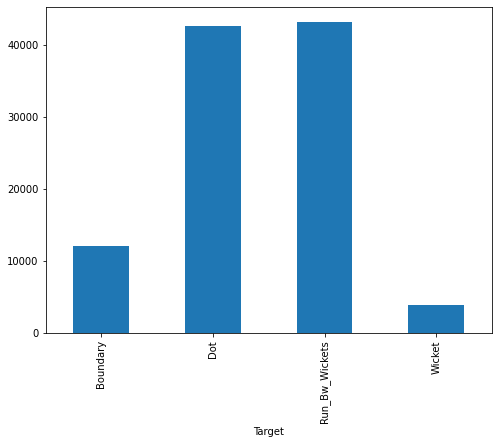

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Target').Commentary.count().plot.bar(ylim=0)
plt.show()

In [15]:
print(df['Commentary'][10], df['Target'][10])

 cramps dhoni up with a shortish delivery. just the -999 again Run_Bw_Wickets


In [17]:
print(df['Commentary'][20], df['Target'][20])

 drilled -999. in typical dhoni fashion, stays back and brings the bottom hand into this punch. length ball again, and sent between mid-off and cover Boundary


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
features = tfidf.fit_transform(train_df.Commentary).toarray()
labels = train_df.Target_Id
features.shape

In [19]:
# Define helper functions to prepare your data
# E.g. Function to clean your textual features
# Function to scale/normalize numeric features
# ---
# ---
# Basic function to clean the text
import nltk
nltk.download('stopwords')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def cleanup_text_column(text):
    
    # your logic here
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
df['Commentary'] = df['Commentary'].apply(cleanup_text_column)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
print(df['Commentary'][10], df['Target'][10])

cramps dhoni shortish delivery 999 Run_Bw_Wickets


In [22]:
print(df['Commentary'][20], df['Target'][20])
print(df['Commentary'].apply(lambda x: len(x.split(' '))).sum())

drilled 999 typical dhoni fashion stays back brings bottom hand punch length ball sent midoff cover Boundary
1063372


In [23]:
X = df.Commentary
y = df.Target_Id
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

#%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7126693122560755
              precision    recall  f1-score   support

           0       0.84      0.25      0.39      3561
           1       0.76      0.79      0.78     12855
           2       0.66      0.82      0.73     12910
           3       0.92      0.03      0.05      1165

    accuracy                           0.71     30491
   macro avg       0.79      0.47      0.49     30491
weighted avg       0.73      0.71      0.69     30491



In [28]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

#%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7037486471417795
              precision    recall  f1-score   support

           0       0.79      0.17      0.28      3561
           1       0.70      0.87      0.77     12855
           2       0.71      0.75      0.73     12910
           3       0.82      0.03      0.05      1165

    accuracy                           0.70     30491
   macro avg       0.75      0.45      0.46     30491
weighted avg       0.72      0.70      0.67     30491



In [30]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.776753796202158
              precision    recall  f1-score   support

           0       0.73      0.67      0.70      3561
           1       0.80      0.83      0.81     12855
           2       0.77      0.77      0.77     12910
           3       0.73      0.64      0.68      1165

    accuracy                           0.78     30491
   macro avg       0.76      0.73      0.74     30491
weighted avg       0.78      0.78      0.78     30491



In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [32]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.7827520047227825
              precision    recall  f1-score   support

           0       0.74      0.69      0.71      2353
           1       0.80      0.84      0.82      8639
           2       0.78      0.77      0.77      8554
           3       0.75      0.62      0.68       781

    accuracy                           0.78     20327
   macro avg       0.77      0.73      0.75     20327
weighted avg       0.78      0.78      0.78     20327



In [33]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

#%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7068923107197324
              precision    recall  f1-score   support

           0       0.78      0.18      0.29      2353
           1       0.70      0.86      0.78      8639
           2       0.71      0.76      0.73      8554
           3       0.81      0.03      0.06       781

    accuracy                           0.71     20327
   macro avg       0.75      0.46      0.47     20327
weighted avg       0.72      0.71      0.67     20327



In [ ]:
# Apply the defined helper functions on your data
# E.g.
train_df["xxxxx"] = train_df._________

In [ ]:
# Generate features from Text columns
# Hint. Tokenize and Vectorize
# E.g.
Cvectorizer = ____(tokenizer=___,______)

In [ ]:
# Apply your vectorizers on the data
____ = Cvectorizer.fit_transform(_____)

In [ ]:
# Split your training data into Train
X_train, X_test, y_train, y_test = 

In [ ]:
# Define your classifier model
classifier = _________

In [ ]:
# Train the model
classifier.fit(X_train,y_train)

In [ ]:
# Generate Predictions
predictions_on_train_data = classifier.predict(X_test)


In [ ]:
#Evaluating the model

# Model Accuracy
print("Model Accuracy:",____.accuracy_score(y_test, predicted))

# Model F1 Score
print("F1 Score:",____.f1_score(y_test, predicted,average=''))

In [ ]:
# Make predictions on the test data
predictions_on_test_data = _________

In [ ]:
#Preparing Submission File
submission_DF = pd.DataFrame({'ID': test_df["ID"], 'Target': predictions_on_test_data})

# Write the submission data frame to a file
predictions_on_test_data.___("")